<a href="https://colab.research.google.com/drive/1MMgKc4tNfeLgQmfrB5W0I7XywUL_8rXy" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### Cloning Base Repo

In [ ]:
!pip install grad-cam
! git clone https://github.com/ak112/pytorch-main-eva8
!mv pytorch-main-eva8/* .
from utils.utils import *
from utils.gradcam import *
from utils.plots import * 
from models.resnet import ResNet18
from main import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=9c638e2dcdd74234bc22322f81c4ac3fc5b646718a0e87445a2cb1a6428e47ae
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam
Cloning into 'pytorch-main-eva8'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 53 (delta 18), reused 40 (delta 11), pack-reused 0
Unpacking objects: 100% (53/53), 10.33 KiB | 813.00 KiB/s, done.


### Dataloader Arguments & Test/Train Dataloaders

In [ ]:
device = get_device()
print(device)
dataloader_args = get_dataloader_args(batch_size=128)
train_transforms = get_train_transforms()
test_transforms = get_test_transforms()
train_loader = load_data(train=True,
                         dataloader_args=dataloader_args,
                         transforms=train_transforms)

test_loader = load_data(train=False,
                        dataloader_args=dataloader_args,
                        transforms=test_transforms)
     


cuda


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


### Model and Params


In [ ]:
!pip install torchsummary
from torchsummary import summary
model = ResNet18().to(device)
summary(model,input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
    

### Model Training

In [ ]:
criterion = get_criterion_for_classification()
optimizer = get_adam_optimizer(model, lr=0.001)
trainer = Trainer(model, device, criterion, optimizer, batch_size=128)
EPOCHS = 20
for epoch in range(EPOCHS):
  print("EPOCH:", epoch)
  trainer.train(train_loader)
  trainer.test(test_loader)

EPOCH: 0


 Loss=1.339977741241455 Batch_id=390 Accuracy=44.40: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]



Test set: Average loss: 0.0112, Accuracy: 5125/10000 (51.25%)

EPOCH: 1


 Loss=1.0537346601486206 Batch_id=390 Accuracy=60.85: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]



Test set: Average loss: 0.0077, Accuracy: 6571/10000 (65.71%)

EPOCH: 2


 Loss=0.7415285110473633 Batch_id=390 Accuracy=68.26: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]



Test set: Average loss: 0.0065, Accuracy: 7144/10000 (71.44%)

EPOCH: 3


 Loss=0.9125477075576782 Batch_id=390 Accuracy=73.03: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s]



Test set: Average loss: 0.0059, Accuracy: 7513/10000 (75.13%)

EPOCH: 4


 Loss=0.6471462249755859 Batch_id=390 Accuracy=76.44: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]



Test set: Average loss: 0.0051, Accuracy: 7847/10000 (78.47%)

EPOCH: 5


 Loss=0.667189359664917 Batch_id=390 Accuracy=79.08: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.0060, Accuracy: 7610/10000 (76.10%)

EPOCH: 6


 Loss=0.46056994795799255 Batch_id=390 Accuracy=80.98: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0045, Accuracy: 8097/10000 (80.97%)

EPOCH: 7


 Loss=0.4954358637332916 Batch_id=390 Accuracy=83.16: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.0044, Accuracy: 8181/10000 (81.81%)

EPOCH: 8


 Loss=0.4053550362586975 Batch_id=390 Accuracy=85.13: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.0040, Accuracy: 8345/10000 (83.45%)

EPOCH: 9


 Loss=0.5809487700462341 Batch_id=390 Accuracy=86.61: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0037, Accuracy: 8491/10000 (84.91%)

EPOCH: 10


 Loss=0.43773341178894043 Batch_id=390 Accuracy=87.95: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]



Test set: Average loss: 0.0040, Accuracy: 8418/10000 (84.18%)

EPOCH: 11


 Loss=0.16285094618797302 Batch_id=390 Accuracy=89.42: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0038, Accuracy: 8555/10000 (85.55%)

EPOCH: 12


 Loss=0.12789620459079742 Batch_id=390 Accuracy=90.69: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]



Test set: Average loss: 0.0039, Accuracy: 8496/10000 (84.96%)

EPOCH: 13


 Loss=0.08721859008073807 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0041, Accuracy: 8463/10000 (84.63%)

EPOCH: 14


 Loss=0.38088005781173706 Batch_id=390 Accuracy=92.63: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s]



Test set: Average loss: 0.0040, Accuracy: 8618/10000 (86.18%)

EPOCH: 15


 Loss=0.1781274378299713 Batch_id=390 Accuracy=93.62: 100%|██████████| 391/391 [00:46<00:00,  8.41it/s]



Test set: Average loss: 0.0045, Accuracy: 8494/10000 (84.94%)

EPOCH: 16


 Loss=0.17955425381660461 Batch_id=390 Accuracy=93.97: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0052, Accuracy: 8446/10000 (84.46%)

EPOCH: 17


 Loss=0.12976862490177155 Batch_id=390 Accuracy=94.77: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]



Test set: Average loss: 0.0047, Accuracy: 8533/10000 (85.33%)

EPOCH: 18


 Loss=0.13570526242256165 Batch_id=390 Accuracy=95.29: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]



Test set: Average loss: 0.0043, Accuracy: 8654/10000 (86.54%)

EPOCH: 19


 Loss=0.08610138297080994 Batch_id=390 Accuracy=95.58: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0046, Accuracy: 8567/10000 (85.67%)



### Plotting Loss Curves

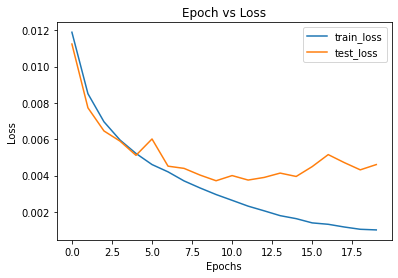

In [ ]:
train_losses, train_acc = trainer.get_train_stats()
test_losses, test_acc = trainer.get_test_stats()
plot_stats(train_losses, test_losses, ['train_loss', 'test_loss'], xlabel='Epochs', ylabel='Loss', title="Epoch vs Loss")

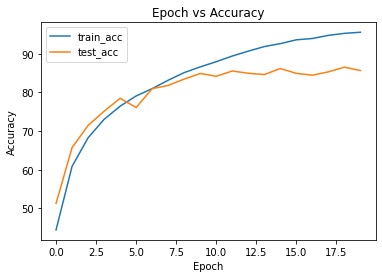

In [ ]:
plot_stats(train_acc, test_acc, ['train_acc', 'test_acc'], xlabel='Epoch', ylabel="Accuracy", title="Epoch vs Accuracy")

### Plotting Misclassified Images

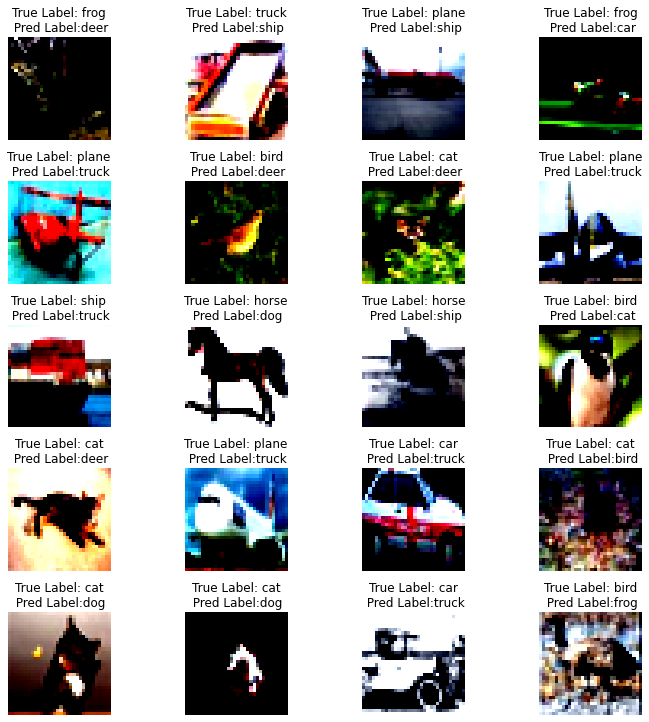

In [ ]:
misclassified_images = trainer.get_misclassified_images(test_loader)
plot_images(misclassified_images)

### Plotting Missclassified Images(GradCam)

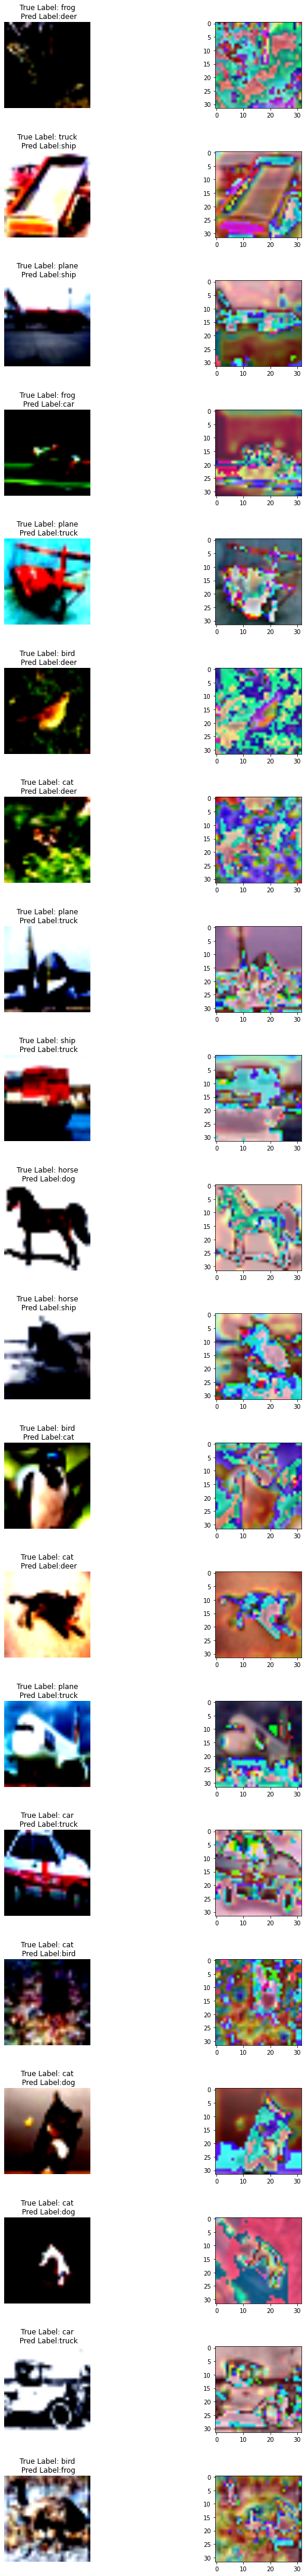

In [ ]:
keys_list = iter(list(misclassified_images.keys()))
target_layers = [model.layer2[1]]
cam = get_cam(model, target_layers, use_cuda = True)
plot_cam(cam, misclassified_images, keys_list=keys_list)